# **Analysis of RDPclassifier analysis results**  
Here we set out to understand the output of RDPclassifier taxonomic classification on our dataset in Order Diptera  
### **Setting up the environment**
1. **Setting the working directory**

In [1]:
getwd()
setwd("/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/diptera")
getwd()

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/code"

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/diptera"

2. **Loading packages**

In [2]:
cat("\nChecking if needed packages are installed... tidyverse packages: 'ggplot2','dplyr' and 'magrittr'")
if("tidyverse" %in% rownames(installed.packages()) == FALSE) {
        install.packages("tidyverse")
} else {
        cat("\nExcellent tidyverse already installed.\nproceeding with summary analysis of RDPclassifier results...\n")
	## loading dplyr, ggplot2 and magrittr packages
    suppressMessages(library(dplyr))
    suppressMessages(library(ggplot2))
    suppressMessages(library(magrittr)) 
}


Checking if needed packages are installed... tidyverse packages: 'ggplot2','dplyr' and 'magrittr'
Excellent tidyverse already installed.
proceeding with summary analysis of RDPclassifier results...


3. **Loading Data**

In [3]:
diptera_taxa = read.delim("enafroCOI_diptera_taxa.tsv", sep = "\t", stringsAsFactors = F, dec = ".", header = T) 
str(diptera_taxa)

'data.frame':	48137 obs. of  34 variables:
 $ Process_ID         : chr  "GBDP19110-15" "GBDP19109-15" "GBDP19118-15" "GBDP4645-08" ...
 $ Phylum             : chr  "Arthropoda" "Arthropoda" "Arthropoda" "Arthropoda" ...
 $ Class              : chr  "Insecta" "Insecta" "Insecta" "Insecta" ...
 $ Order              : chr  "Diptera" "Diptera" "Diptera" "Diptera" ...
 $ Family             : chr  "Psychodidae" "Psychodidae" "Psychodidae" "Ceratopogonidae" ...
 $ Subfamily          : chr  "Phlebotominae" "Phlebotominae" "Phlebotominae" "Ceratopogoninae" ...
 $ Tribe              : logi  NA NA NA NA NA NA ...
 $ Genus              : chr  "Sergentomyia" "Sergentomyia" "Sergentomyia" "Culicoides" ...
 $ Species            : chr  "Sergentomyia_minuta" "Sergentomyia_minuta" "Sergentomyia_minuta" "Culicoides_imicola" ...
 $ Subspecies         : chr  NA NA NA NA ...
 $ Country            : chr  "Algeria" "Algeria" "Algeria" "Algeria" ...
 $ Exactsite          : chr  NA NA NA NA ...
 $ Latitude     

In [4]:
subset(as.data.frame(table(c(diptera_taxa$Family))), Freq >= 20)

,Var1,Freq
,<fct>,<int>
2,Agromyzidae,234
3,Anthomyiidae,39
4,Asilidae,59
8,Blephariceridae,25
9,Bombyliidae,41
10,Calliphoridae,468
12,Cecidomyiidae,348
13,Ceratopogonidae,2933
16,Chironomidae,289


4. **Detailed analysis of the distribution of variables as a assinged by RDPclassifier**

In [5]:
# Total number of records within the file vs those with over 500 base-pairs
cat(nrow(diptera_taxa), "total number of records from diptera with",
    nrow(subset(diptera_taxa, seq_len >= 500)),
    "records having over 500 base-pairs\n")
# Total number of sequences with predefined species taxa vs 
# those with over 500 base-pairs
cat(nrow(subset(diptera_taxa, Species != "NA")),
    "records with a predefined species from which",
    nrow(subset(diptera_taxa, Species != "NA" & seq_len >= 500 )), 
    "have over 500 base pairs\n\n")
# All records assigned species classification
cat(nrow(subset(diptera_taxa, Species_sc >= 0)),
    "records were assigned species classification with bootstrap support ranging from 0 to 1\n\n")
# All records assigned species classification of BS support of 1, >= 0.95 and >= 0.70
cat(nrow(subset(diptera_taxa, Species_sc == 1.0)),
    "records were classiffied with a bootsrap of = 1,",
   nrow(subset(diptera_taxa, Species_sc >= 0.95)),
    "with >= 0.95 bootstrap support and",
   nrow(subset(diptera_taxa, Species_sc >= 0.70)),
   "with >= 0.7 bootstrap support\n\n")
# All records with predefined species and
# assigned species classification at BS support of 1, >= 0.95 and >= 0.70
cat(nrow(subset(diptera_taxa, Species != "NA" & Species_sc == 1.0)),
    "records, with predefined species, were classiffied with a bootsrap of = 1,",
   nrow(subset(diptera_taxa, Species != "NA" & Species_sc >= 0.95)),
    "with >= 0.95 bootstrap support and",
   nrow(subset(diptera_taxa, Species != "NA" & Species_sc >= 0.70)),
   "with >= 0.7 bootstrap support\n\n")
# All records with predefined species, seq-length of >= 500 and
# assigned species classification at BS support of 1, >= 0.95 and >= 0.70
cat(nrow(subset(diptera_taxa, seq_len >= 500 & Species_sc == 1.0)),
    "records, with >= 500 seq. length, were classiffied with a bootsrap of = 1,",
   nrow(subset(diptera_taxa, seq_len >= 500 & Species_sc >= 0.95)),
    "with >= 0.95 bootstrap support and",
   nrow(subset(diptera_taxa, seq_len >= 500 & Species_sc >= 0.70)),
   "with >= 0.7 bootstrap support\n\n")
# All records without predefined species, but with seq-length of >= 500 and
# assigned species classification at BS support of 1, >= 0.95 and >= 0.70
cat(nrow(subset(diptera_taxa, Species != "NA" & seq_len >= 500 & Species_sc == 1.0)),
    "records, with predefined species and >= 500 seq. length, were classiffied with a bootsrap of = 1,",
   nrow(subset(diptera_taxa, Species != "NA" & seq_len >= 500 & Species_sc >= 0.95)),
    "with >= 0.95 bootstrap support and",
   nrow(subset(diptera_taxa, Species != "NA" & seq_len >= 500 & Species_sc >= 0.70)),
   "with >= 0.7 bootstrap support\n\n")

# All records with a predifined species or RDP species classification BS support of 1.0
diptera_taxa %>% filter(Species != "NA" | Species_sc == 1.0) -> diptera_100per_classified
# All records with a predifined species or RDP species classification BS support of 0.95
diptera_taxa %>% filter(Species != "NA" | Species_sc >= 0.95) -> diptera_95per_classified
cat(nrow(diptera_100per_classified),
    "records either had predefined species,",
    "or were classified with a bootstrap value of 1.0,",
   nrow(diptera_95per_classified),
    "with bootstrap value of >=0.95 and",
   nrow(subset(diptera_taxa, Species != "NA" | Species_sc >= 0.7)),
   "with boostrap value of >=0.7\n\n")
cat(nrow(subset(diptera_taxa, Species_sc == 1.0 & seq_len >= 500 )),
    "records classified into species have sequences with over 500 bases, with",
    nrow(subset(diptera_taxa, is.na(Species) & Species_sc == 1.0 & seq_len >= 500 )),
    "having no prior species classification\n")
cat(nrow(subset(diptera_taxa, Species_sc == 1.0 & Species != diptera_taxa$As_species)),
    "records with a species classication confidence of 1.0",
    "have differing assinged species from predefined species,",
   nrow(subset(
       diptera_taxa, seq_len >= 500 & Species_sc == 1.0 & Species != diptera_taxa$As_species)),
    "of which have over 500 base-pairs")
enafroCOI_diptera_taxa_clash <- subset(
    diptera_taxa, seq_len >= 500 & Species_sc == 1.0 & Species != diptera_taxa$As_species)
write.table(enafroCOI_diptera_taxa_clash, file = "enafroCOI_diptera_taxa_clash.tsv",
            row.names = FALSE, col.names= TRUE, sep = "\t", quote=FALSE )
#head(diptera_classified)
head(subset(diptera_taxa, Species != "NA" & Species_sc == 0))

48137 total number of records from diptera with 47507 records having over 500 base-pairs
6629 records with a predefined species from which 6125 have over 500 base pairs

48137 records were assigned species classification with bootstrap support ranging from 0 to 1

8049 records were classiffied with a bootsrap of = 1, 9244 with >= 0.95 bootstrap support and 11337 with >= 0.7 bootstrap support

4407 records, with predefined species, were classiffied with a bootsrap of = 1, 4785 with >= 0.95 bootstrap support and 5124 with >= 0.7 bootstrap support

7717 records, with >= 500 seq. length, were classiffied with a bootsrap of = 1, 8883 with >= 0.95 bootstrap support and 10957 with >= 0.7 bootstrap support

4122 records, with predefined species and >= 500 seq. length, were classiffied with a bootsrap of = 1, 4479 with >= 0.95 bootstrap support and 4802 with >= 0.7 bootstrap support

10271 records either had predefined species, or were classified with a bootstrap value of 1.0, 11088 with bootst

,Process_ID,Phylum,Class,Order,Family,Subfamily,Tribe,Genus,Species,Subspecies,⋯,As_class,Class_sc,As_order,Order_sc,As_family,Family_sc,As_genus,Genus_sc,As_species,Species_sc
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
8493,NHMBF089-11,Arthropoda,Insecta,Diptera,Simuliidae,Simuliinae,NA,Simulium,Simulium_damnosum_s.l.,NA,⋯,Insecta,0.87,Diptera,0.45,Tabanidae,0.06,Atylotus,0.00,Atylotus_thoracius,0
8494,NHMBF090-11,Arthropoda,Insecta,Diptera,Simuliidae,Simuliinae,NA,Simulium,Simulium_damnosum_s.l.,NA,⋯,Insecta,0.87,Diptera,0.45,Tabanidae,0.06,Atylotus,0.00,Atylotus_thoracius,0
8617,ASIND134-12,Arthropoda,Insecta,Diptera,Syrphidae,Microdontinae,NA,Paragodon,Paragodon_paragoides,NA,⋯,Insecta,0.98,Diptera,0.42,Muscidae,0.05,Hydrotaea,0.04,Hydrotaea_pellucens,0
40445,NHMBF097-12,Arthropoda,Insecta,Diptera,Simuliidae,Simuliinae,NA,Simulium,Simulium_damnosum_s.l.,NA,⋯,Insecta,0.92,Diptera,0.49,Tabanidae,0.13,Atylotus,0.01,Atylotus_thoracius,0


5. **Graphical representation of the distributions**

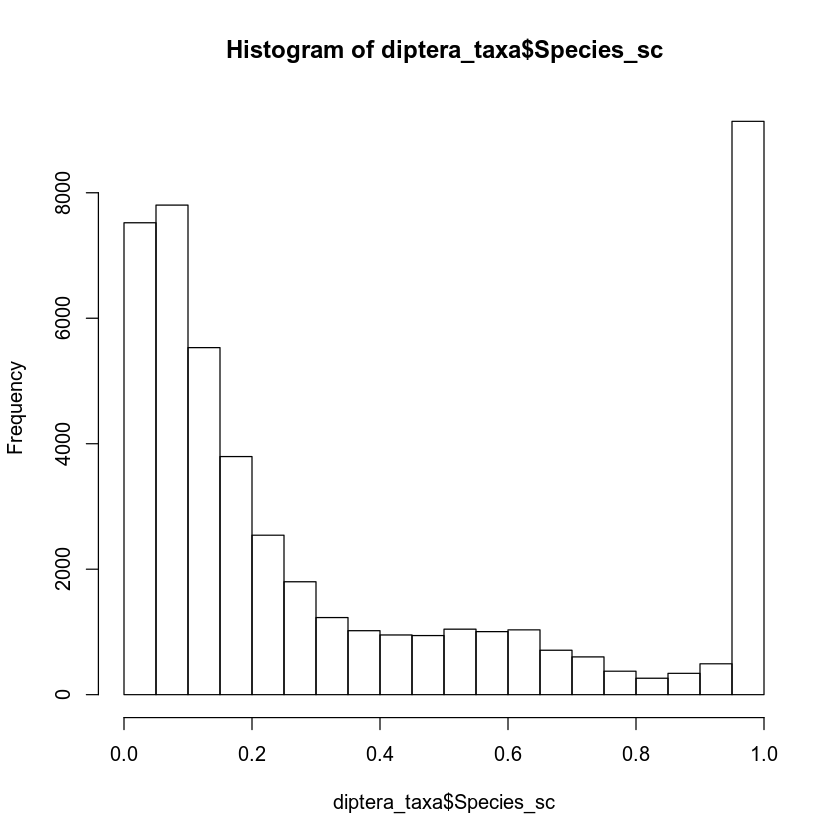

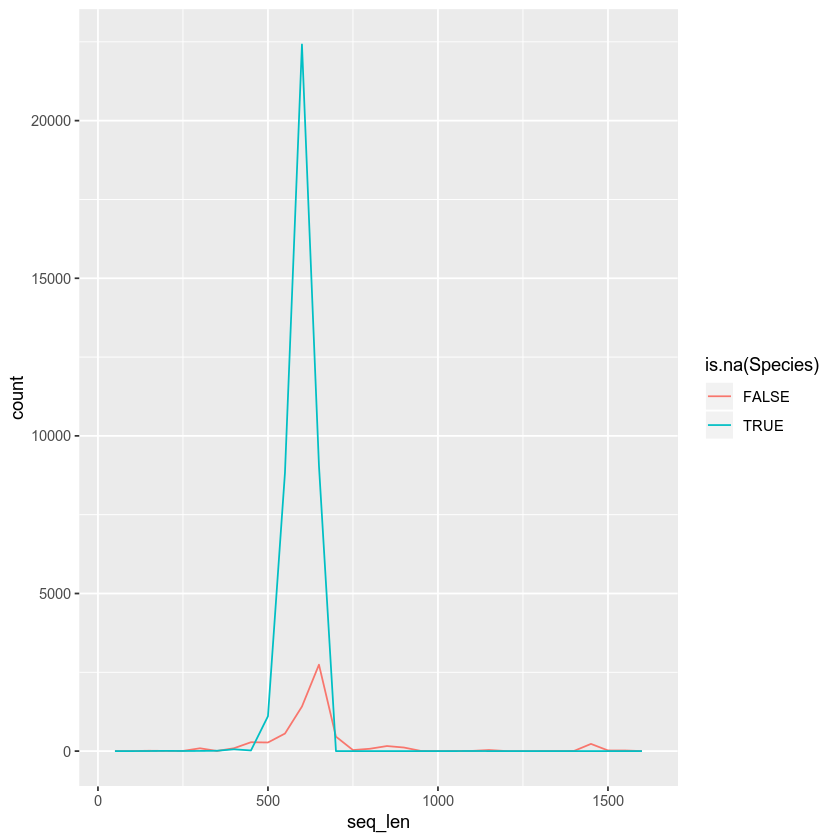

63 Families are represented


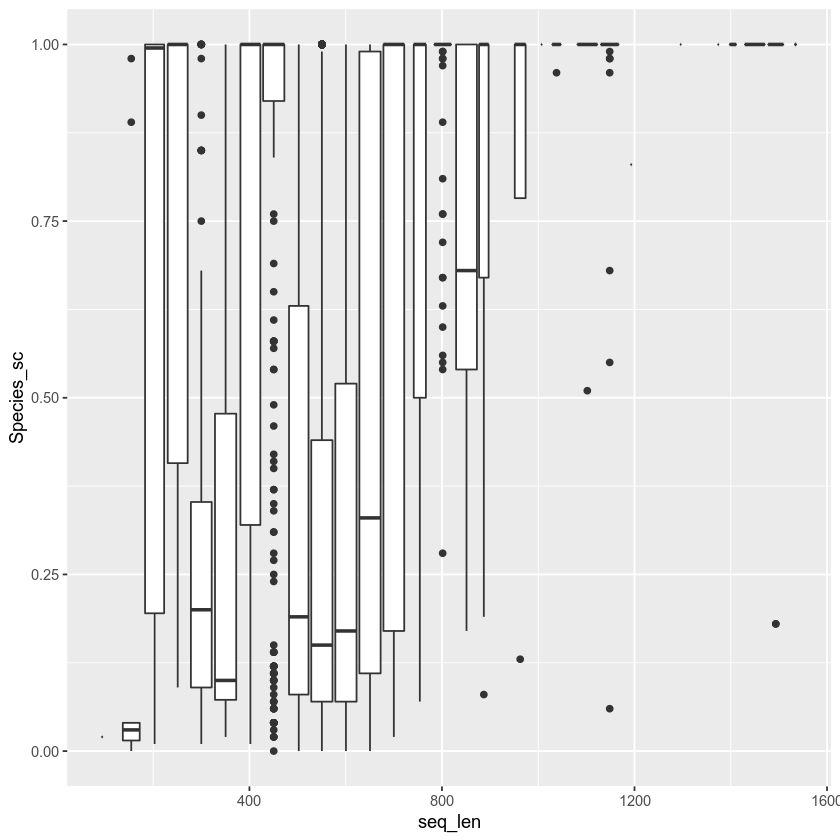

11337 sequences have over 0.7 species identification score


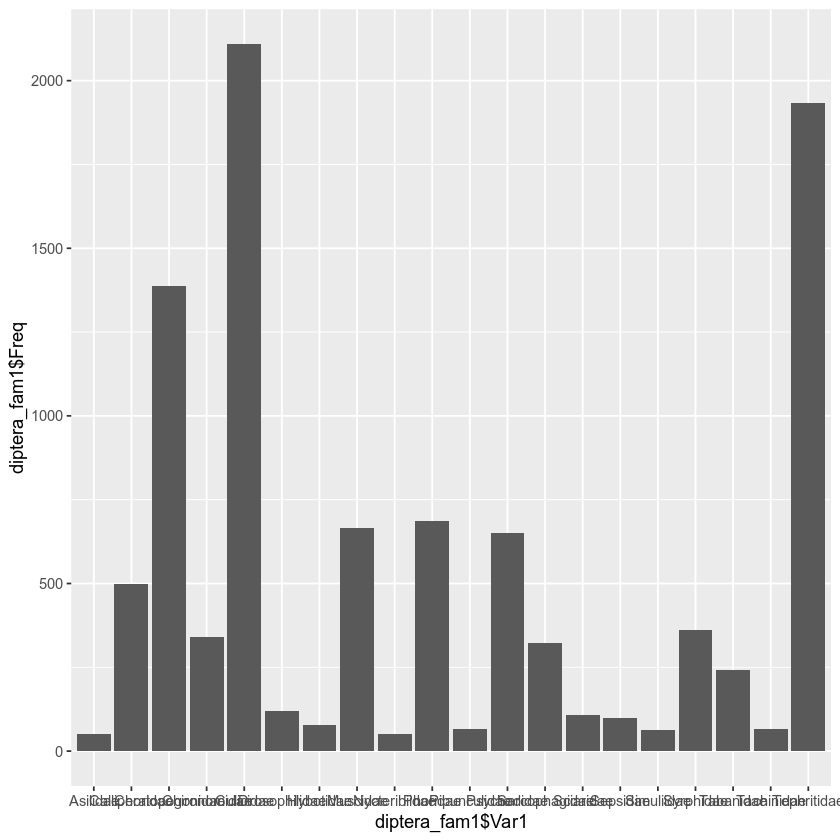

In [6]:
#Species score distribution.
hist(diptera_taxa$Species_sc)
ggplot(diptera_taxa, mapping = aes(x = seq_len)) + geom_freqpoly(
    mapping = aes(colour = is.na(Species)), binwidth = 50)
ggplot(diptera_taxa, aes(x = seq_len, y = Species_sc)) + geom_boxplot(
    mapping = aes(group = cut_width(seq_len, 50)))
cat(nrow(as.data.frame(table(c((diptera_taxa)$Family)))),
    "Families are represented\n")
#as.data.frame(table(c(diptera_taxa$Family)))
diptera_taxa %>% filter(diptera_taxa$Family_sc == 1.0 ) -> diptera_family
as.data.frame(table(c(diptera_family$As_family))) -> diptera_fam
diptera_fam %>% filter(diptera_fam$Freq > 50 ) -> diptera_fam1
ggplot(
    data = diptera_fam1
) + geom_bar(
    mapping = aes (x = diptera_fam1$Var1, y = diptera_fam1$Freq),
    stat = "identity")
#ggplot( data = diptera_family ) + geom_bar(mapping = aes(x = diptera_family$As_family ))
diptera_taxa %>% filter(Species_sc >= 0.7 ) -> diptera_newsp
cat(nrow(diptera_newsp),"sequences have over 0.7 species identification score\n")
#head(diptera_newsp)
#hist(diptera_newsp$)
#ggplot(diptera_genussc_over07, aes(x = seq_len, y = Species_sc)) + geom_line()
#hist(as.integer(diptera_genussc_over07$seq_len))